# Canadian Immigration Analysis

In this notebook, we will:

*   Create and customize basic plots with Matplotlib on dataset

## Import Libraries<a id="0"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

Import the `matplotlib` library.


In [2]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.8.2


In [3]:
import js

## Fetching Data

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this notebook, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.
<br><br>

In [4]:
df_can = pd.read_csv('Canada.csv')

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's take a look at the first five items in our dataset.


In [5]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset.


In [6]:
print(df_can.shape)

(195, 39)


Setting the country name as index - useful for quickly looking up countries using .loc method.

In [7]:
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Now, the country names serve as indices.

In [8]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [9]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data

years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Line Plot

Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>We can create a line plot directly on axes by calling plot function plot()

In [10]:
#As years is in the array format, you will be required to map it to str for plotting
y=list(map(str, years))

#creating df with only years columns from 1980 - 2013
df_line=df_can[years]

#Applying sum to get total immigrants year-wise
total_immigrants=df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

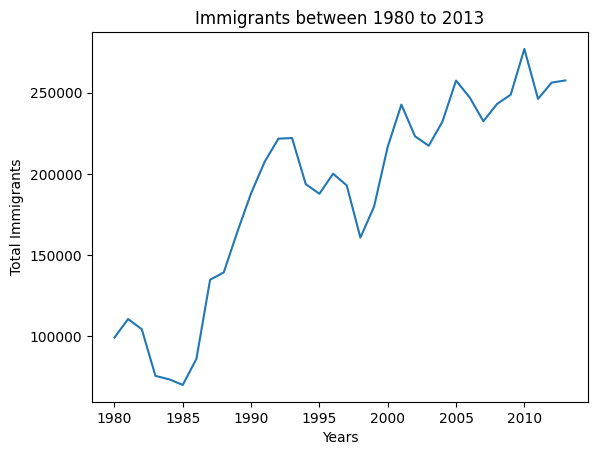

In [11]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Plot the line
ax.plot(total_immigrants)

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

#### Let's now customize the above plot's appearance 


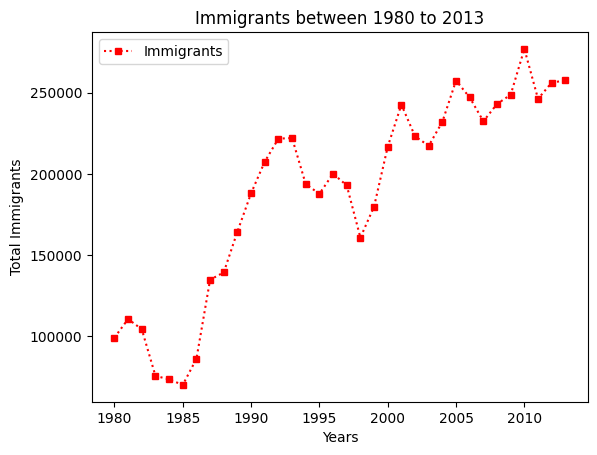

In [12]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Customizing the appearance of Plot
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='red', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line
#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

#### Let's include the background grid, a legend and try to change the limits on the axis


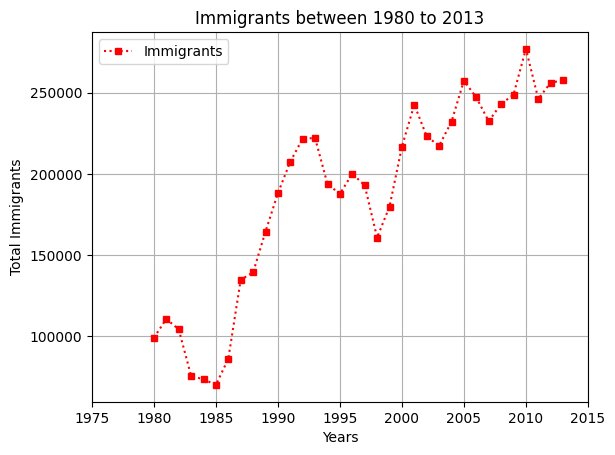

In [13]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='red', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

#Display the plot
plt.show()

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

#### Plotting a line graph of immigration from Haiti 

You be required to create a dataframe where the name of the 'Country' is equal to 'Haiti' and years from 1980 - 2013<br> Also you will be required to transpose the new dataframe in to a series for plotting<br>Might also have to change the type of index of the series to integer for a better look of the plot<br> Then create fig and ax and call function plot() on the data.


In [14]:
df_can.head()

df_can.reset_index(inplace=True)

In [15]:
haiti = df_can[df_can['Country']=='Haiti']
haiti = haiti[years].transpose()

In [16]:
haiti.columns=['Total']
haiti.head()

,Total
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


#### We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. <br>Let's annotate this spike in the plot by using the *ax.annotate()* method.


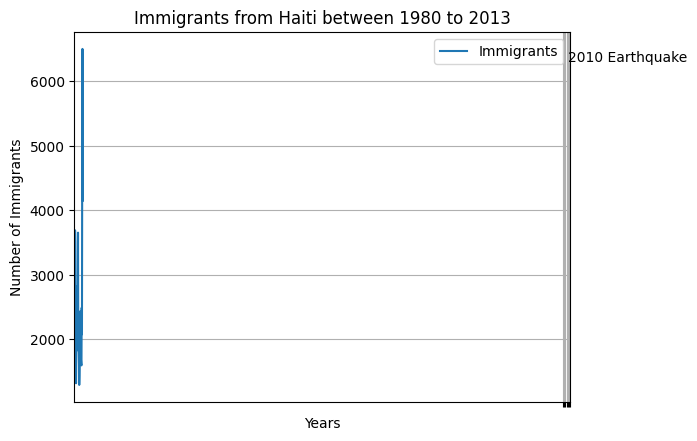

In [17]:
fig, ax = plt.subplots()

ax.plot(haiti)

#Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 

haiti.index = haiti.index.map(int)

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

#Enabling Grid and ticks
ax.grid(True)  
ax.set_xticks(list(range(1980, 2015, 5)))

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

ax.annotate('2010 Earthquake',xy=(2001, 6300))
plt.show()

## Scatter Plot

Let's created a *Scatter plot* to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>We can create a scatter plot directly on ax by calling plot function scatter()

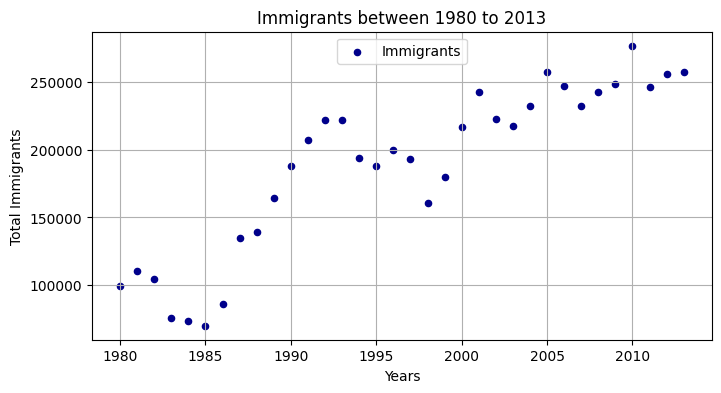

In [18]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

## Bar Plot

Let's create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. 
<br><br>Apply sort_values function on the 'Total' column of our data<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe and can create a separatedataframe for top five countries<br><br>We can further use the names of the countries to label each bar on the plot

In [19]:
#Sorting the dataframe on 'Total' in descending order
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries with head function
df_top5 = df_can.head()

#resetting the index back to original way
df_bar_5=df_top5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.Country)
label

df_bar_5.head()

,index,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


##### The third name is too lengthy to fit on the x-axis as label. Let's fix this using indexing


In [20]:
label[2]='UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

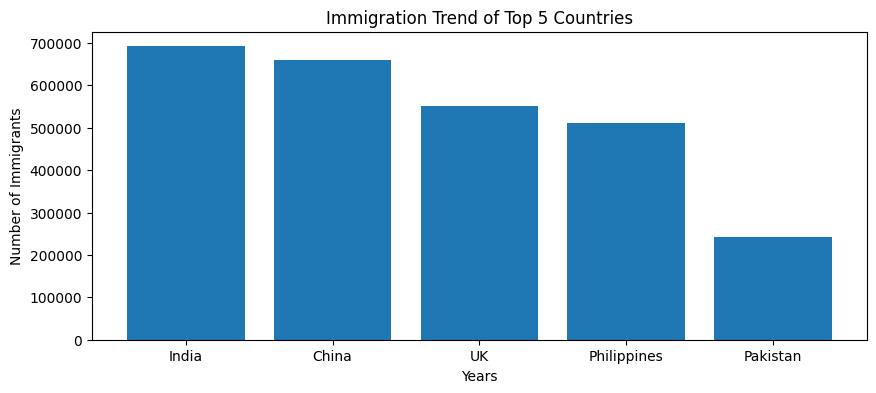

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_bar_5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

#### Creating a bar plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 

In [22]:
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

df_least5 = df_can.head()

df_least5_bar = df_least5.reset_index()

Text(0.5, 0, 'Years')

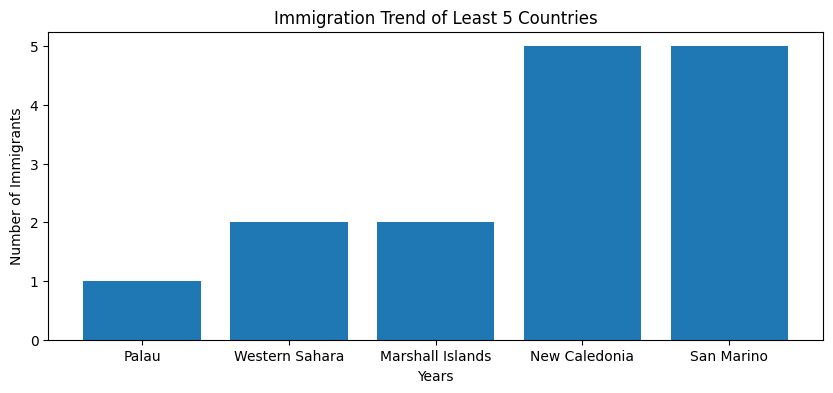

In [23]:
label = list(df_least5_bar.Country)

fig, ax = plt.subplots(figsize=(10,4))

ax.bar(label, df_least5_bar['Total'], label=label)
ax.set_title('Immigration Trend of Least 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

## Histogram

Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [24]:
df_can.groupby(['Country'])['2013'].sum().reset_index(drop=False).head()

,Country,2013
0,Afghanistan,2004
1,Albania,603
2,Algeria,4331
3,American Samoa,0
4,Andorra,1


In [25]:
df_country = df_can.groupby(['Country'])['2013'].sum().reset_index()


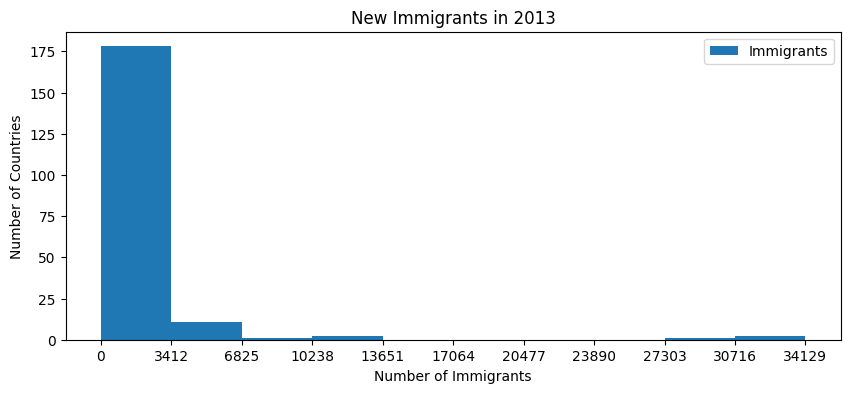

In [26]:
# Plot the bar
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country['2013'])

#you can check the arrays in count with indexing count[0] for count, count[1] for bins

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int,count[1])))
ax.legend(['Immigrants'])

#Display the plot
plt.show()

#### What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [27]:
df_can.groupby(by=['Country']).head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
131,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
109,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
123,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [28]:
df=df_can.groupby(['Country'])[years].sum()
df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.T
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


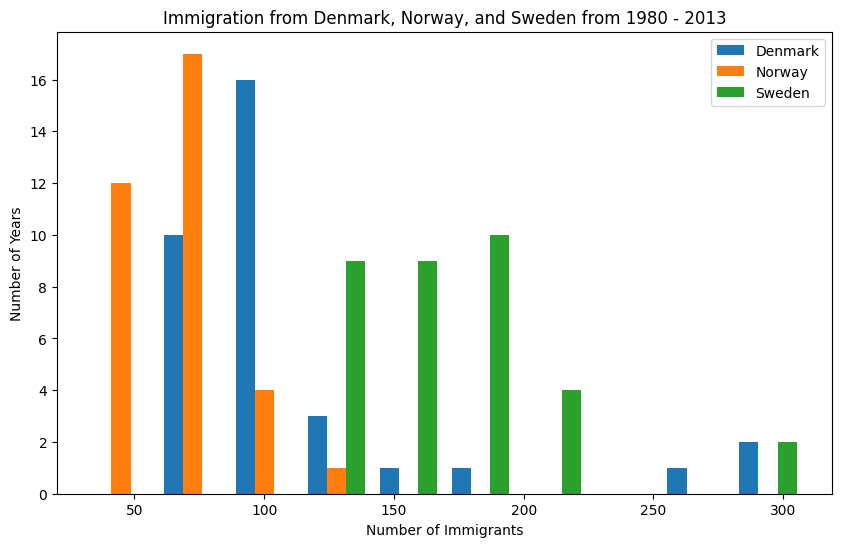

In [29]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])

#Display the plot
plt.show()

#### What is the immigration distribution for China and India for years 2000 to 2013?

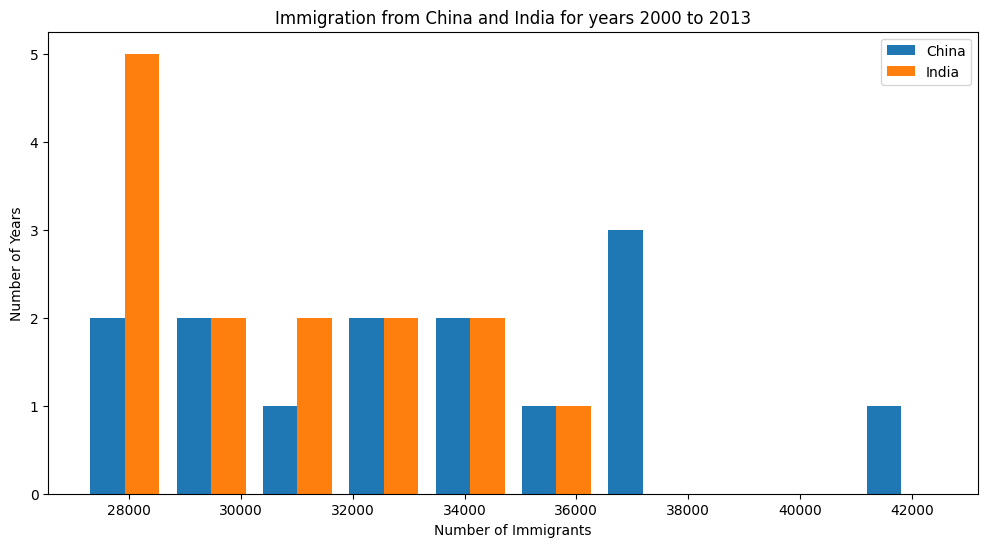

In [30]:
df = df_can.groupby(['Country'])[years].sum()

y = list(map(str, range(2000,2014)))

df_ci = df.loc[['China','India'],y]
df_ci = df_ci.transpose()

fig,ax = plt.subplots(figsize=(12,6))
ax.hist(df_ci)

ax.set_title('Immigration from China and India for years 2000 to 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['China','India'])

plt.show()

## Pie Chart

Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985

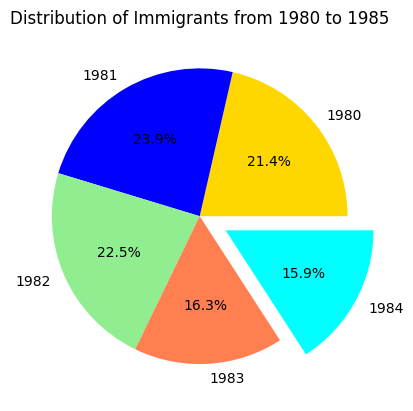

In [31]:
fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total_immigrants[0:5], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%.1f%%',explode = [0,0,0,0,0.2]) #using explode to highlight the lowest 

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]) #include legend, if you donot want to pass the labels
plt.show()

#### Creating a pie chart representing the total immigrants proportion for each continent

First, we have to group the data over continents and get the sum on total. Then you can pass this data to the pie function

In [32]:
#Creating data for plotting pie
df_con=df_can.groupby('Continent')['Total'].sum().reset_index()
label=list(df_con.Continent)
label[3] = 'LAC'
label[4] = 'NA'
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


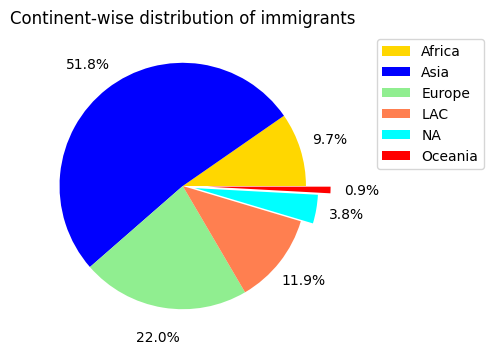

In [33]:
fig,ax = plt.subplots(figsize=(10,4))

ax.pie( df_con['Total'],
        colors=['gold','blue','lightgreen','coral','cyan','red'],
        autopct='%.1f%%',
        pctdistance=1.25,
        explode=[0,0,0,0,0.1,0.2]
)

ax.set_aspect('equal')

plt.title('Continent-wise distribution of immigrants')
ax.legend(label, bbox_to_anchor=(1,0,0.5,1))

plt.show()

## Sub-plotting

For instance, let’s create a line and scatter plot in one row <br>

plt.subplots() <br>

Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, we assign the ‘Sharey’ parameter as True in the code below.

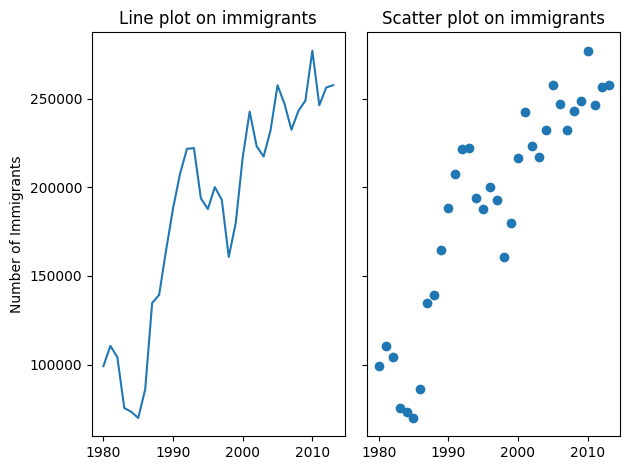

In [34]:
# Create a figure with two axes in a row
fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

We can also implement the subplotting with **add_subplot()** as below:-

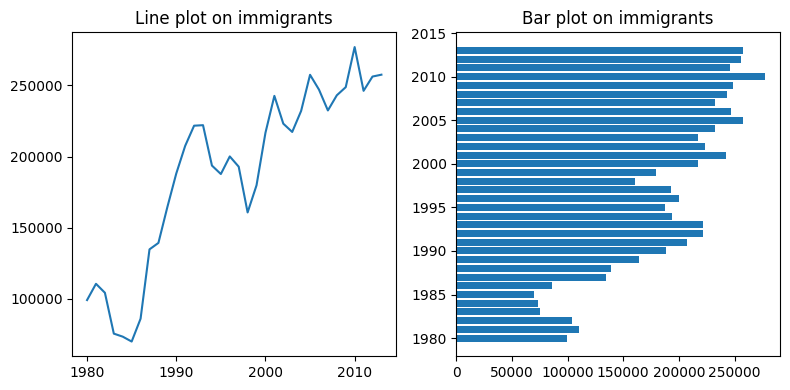

In [35]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)

#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)

#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

#### © IBM Corporation 2020. All rights reserved.